upload labelled data and mount Google drive to colab

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

import os
os.getcwd()

check info about colab environment

In [2]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2021 NVIDIA Corporation
Built on Sun_Feb_14_21:12:58_PST_2021
Cuda compilation tools, release 11.2, V11.2.152
Build cuda_11.2.r11.2/compiler.29618528_0


In [3]:
import tensorflow as tf
tf.__version__

'2.9.2'

make sure we see a GPU

In [4]:
tf.test.gpu_device_name()

'/device:GPU:0'

go to the working space and install deeplabcut

In [4]:
%cd /content/gdrive/MyDrive/deeplabcut

/content/gdrive/MyDrive/deeplabcut


In [5]:
!pip install deeplabcut

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 593 kB 4.7 MB/s 
     |████████████████████████████████| 177 kB 75.2 MB/s 
     |████████████████████████████████| 109 kB 73.3 MB/s 
     |████████████████████████████████| 296 kB 66.6 MB/s 
     |████████████████████████████████| 11.2 MB 66.0 MB/s 
     |████████████████████████████████| 352 kB 75.2 MB/s 
     |████████████████████████████████| 965 kB 58.8 MB/s 
     |████████████████████████████████| 500 kB 73.8 MB/s 
  Created wheel for filterpy: filename=filterpy-1.4.5-py3-none-any.whl size=110474 sha256=12ffd14391d23d0b3a745fd63e3836e736df9294a38ca2bfb91efe8fe5d2c7b3
  Stored in directory: /root/.cache/pip/wheels/ce/e0/ee/a2b3c5caab3418c1ccd8c4de573d4cbe13315d7e8b0a55fbc2
Successfully built filterpy
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstal

In [6]:
# install packages for plot evaluations
!pip install Pillow==4.0.0

from PIL import Image
def register_extension(id, extension): Image.EXTENSION[extension.lower()] = id.upper()
Image.register_extension = register_extension
def register_extensions(id, extensions):
  for extension in extensions: register_extension(id, extension)
Image.register_extensions = register_extensions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.1 MB 4.7 MB/s 
     |████████████████████████████████| 112 kB 39.7 MB/s 
  Created wheel for Pillow: filename=Pillow-4.0.0-cp37-cp37m-linux_x86_64.whl size=1007286 sha256=21c8ddb05e3da30e19f80d9b8e81f9ba7733098cc1a951263950467639eea52f
  Stored in directory: /root/.cache/pip/wheels/ec/1e/24/dbc5e4964ea99cad93230a9013d934fb5adc322c3102f69e45
  Created wheel for olefile: filename=olefile-0.46-py2.py3-none-any.whl size=35432 sha256=a63899f01f3552366dbebb7bfaafb77abd97763dca53ae2f1745cc91a7ae9099
  Stored in directory: /root/.cache/pip/wheels/84/53/e6/37d90ccb3ad1a3ca98d2b17107e9fda401a7c541ea1eb6a65a
Successfully built Pillow olefile
  Attempting uninstall: Pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2
ERROR: pip's dependency resolver does not currently take into accou

In [1]:
# GUIs don't work on the cloud, so label the data locally and supress wxPython
import os
os.environ["DLClight"] = "True"
os.environ["Colab"] = "True"

In [2]:
# update the path
%cd /content/gdrive/MyDrive/deeplabcut/flies-seizure-huiqi-2022-10-13

/content/gdrive/MyDrive/deeplabcut/flies-seizure-huiqi-2022-10-13


In [3]:
# sometimes need to restart running time so that deeplabcut can be import.
import deeplabcut as dlc

Loading DLC 2.2.3...


/usr/local/lib/python3.7/dist-packages/skimage/io/manage_plugins.py:23: UserWarning: Your installed pillow version is < 7.1.0. Several security issues (CVE-2020-11538, CVE-2020-10379, CVE-2020-10994, CVE-2020-10177) have been fixed in pillow 7.1.0 or higher. We recommend to upgrade this library.
  from .collection import imread_collection_wrapper


DLC loaded in light mode; you cannot use any GUI (labeling, relabeling and standalone GUI)


edit the project path in the config.yaml file to the google drive link. Then set the variable below

In [4]:
config_path = '/content/gdrive/MyDrive/deeplabcut/flies-seizure-huiqi-2022-10-13/config.yaml'

In [ ]:
# create training dataset in colab, because the local is windows but colab is Linux
dlc.create_training_dataset(config_path, num_shuffles = 1, augmenter_type='imgaug')

The training dataset is successfully created. Use the function 'train_network' to start training. Happy training!


[(0.95,
  1,
  (array([12, 13, 26, 36, 25, 18, 22, 33, 14, 38,  2, 34, 24, 27,  3, 16, 29,
           7, 19,  1, 37,  9, 30, 15, 17, 20,  8,  6,  5, 21,  4, 39,  0, 28,
          11, 35, 23, 10]), array([31, 32])))]

In [ ]:
# start training
dlc.train_network(config_path,shuffle = 1, displayiters = 500,saveiters=10000,maxiters=100000)

Config:
{'all_joints': [[0],
                [1],
                [2],
                [3],
                [4],
                [5],
                [6],
                [7],
                [8],
                [9],
                [10],
                [11],
                [12],
                [13]],
 'all_joints_names': ['mouth',
                      'head',
                      'thorax',
                      'belly_upper',
                      'belly_mid',
                      'belly_dist',
                      'legDist_left_fore',
                      'legDist_left_mid',
                      'legDist_left_hind',
                      'legDist_right_fore',
                      'legDist_right_mid',
                      'legDist_right_hind',
                      'thorax_back',
                      'abdomen'],
 'alpha_r': 0.02,
 'apply_prob': 0.5,
 'batch_size': 1,
 'contrast': {'clahe': True,
              'claheratio': 0.1,
              'histeq': True,
              

Selecting single-animal trainer
Batch Size is 1


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


Loading ImageNet-pretrained resnet_50
Max_iters overwritten as 100000
Display_iters overwritten as 500
Save_iters overwritten as 10000
Training parameter:
{'stride': 8.0, 'weigh_part_predictions': False, 'weigh_negatives': False, 'fg_fraction': 0.25, 'mean_pixel': [123.68, 116.779, 103.939], 'shuffle': True, 'snapshot_prefix': '/content/gdrive/MyDrive/deeplabcut/flies-seizure-huiqi-2022-10-13/dlc-models/iteration-0/flies-seizureOct13-trainset95shuffle1/train/snapshot', 'log_dir': 'log', 'global_scale': 0.8, 'location_refinement': True, 'locref_stdev': 7.2801, 'locref_loss_weight': 0.05, 'locref_huber_loss': True, 'optimizer': 'sgd', 'intermediate_supervision': False, 'intermediate_supervision_layer': 12, 'regularize': False, 'weight_decay': 0.0001, 'crop_pad': 0, 'scoremap_dir': 'test', 'batch_size': 1, 'dataset_type': 'imgaug', 'deterministic': False, 'mirror': False, 'pairwise_huber_loss': False, 'weigh_only_present_joints': False, 'partaffinityfield_predict': False, 'pairwise_predic

iteration: 500 loss: 0.0298 lr: 0.005
iteration: 1000 loss: 0.0186 lr: 0.005
iteration: 1500 loss: 0.0168 lr: 0.005
iteration: 2000 loss: 0.0155 lr: 0.005
iteration: 2500 loss: 0.0145 lr: 0.005
iteration: 3000 loss: 0.0136 lr: 0.005
iteration: 3500 loss: 0.0125 lr: 0.005
iteration: 4000 loss: 0.0122 lr: 0.005
iteration: 4500 loss: 0.0116 lr: 0.005
iteration: 5000 loss: 0.0108 lr: 0.005
iteration: 5500 loss: 0.0103 lr: 0.005
iteration: 6000 loss: 0.0099 lr: 0.005
iteration: 6500 loss: 0.0096 lr: 0.005
iteration: 7000 loss: 0.0092 lr: 0.005
iteration: 7500 loss: 0.0091 lr: 0.005
iteration: 8000 loss: 0.0088 lr: 0.005
iteration: 8500 loss: 0.0085 lr: 0.005
iteration: 9000 loss: 0.0082 lr: 0.005
iteration: 9500 loss: 0.0082 lr: 0.005
iteration: 10000 loss: 0.0078 lr: 0.005
iteration: 10500 loss: 0.0097 lr: 0.02
iteration: 11000 loss: 0.0090 lr: 0.02
iteration: 11500 loss: 0.0080 lr: 0.02
iteration: 12000 loss: 0.0075 lr: 0.02
iteration: 12500 loss: 0.0071 lr: 0.02
iteration: 13000 loss: 0.

Running  DLC_resnet50_flies-seizureOct13shuffle1_10000  with # of training iterations: 10000


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


Running evaluation ...


40it [00:53,  1.35s/it]
/usr/local/lib/python3.7/dist-packages/deeplabcut/pose_estimation_tensorflow/core/evaluate.py:881: RuntimeWarning: Mean of empty slice
  RMSEpcutoff.iloc[testIndices].values.flatten()


Analysis is done and the results are stored (see evaluation-results) for snapshot:  snapshot-10000
Results for 10000  training iterations: 95 1 train error: 26.67 pixels. Test error: 63.96  pixels.
With pcutoff of 0.6  train error: 7.36 pixels. Test error: nan pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Plotting...


100%|██████████| 40/40 [00:31<00:00,  1.28it/s]


Running  DLC_resnet50_flies-seizureOct13shuffle1_20000  with # of training iterations: 20000
Running evaluation ...


40it [00:05,  6.80it/s]


Analysis is done and the results are stored (see evaluation-results) for snapshot:  snapshot-20000
Results for 20000  training iterations: 95 1 train error: 13.98 pixels. Test error: 61.17  pixels.
With pcutoff of 0.6  train error: 5.24 pixels. Test error: 10.37 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Plotting...


100%|██████████| 40/40 [00:31<00:00,  1.27it/s]


Running  DLC_resnet50_flies-seizureOct13shuffle1_30000  with # of training iterations: 30000
Running evaluation ...


40it [00:05,  6.77it/s]


Analysis is done and the results are stored (see evaluation-results) for snapshot:  snapshot-30000
Results for 30000  training iterations: 95 1 train error: 7.75 pixels. Test error: 56.84  pixels.
With pcutoff of 0.6  train error: 5.84 pixels. Test error: 6.72 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Plotting...


100%|██████████| 40/40 [00:31<00:00,  1.27it/s]


Running  DLC_resnet50_flies-seizureOct13shuffle1_40000  with # of training iterations: 40000
Running evaluation ...


40it [00:06,  6.08it/s]


Analysis is done and the results are stored (see evaluation-results) for snapshot:  snapshot-40000
Results for 40000  training iterations: 95 1 train error: 5.02 pixels. Test error: 58.51  pixels.
With pcutoff of 0.6  train error: 3.99 pixels. Test error: 24.31 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Plotting...


100%|██████████| 40/40 [00:31<00:00,  1.27it/s]

The network is evaluated and the results are stored in the subdirectory 'evaluation_results'.
Please check the results, then choose the best model (snapshot) for prediction. You can update the config.yaml file with the appropriate index for the 'snapshotindex'.
Use the function 'analyze_video' to make predictions on new videos.
Otherwise, consider adding more labeled-data and retraining the network (see DeepLabCut workflow Fig 2, Nath 2019)


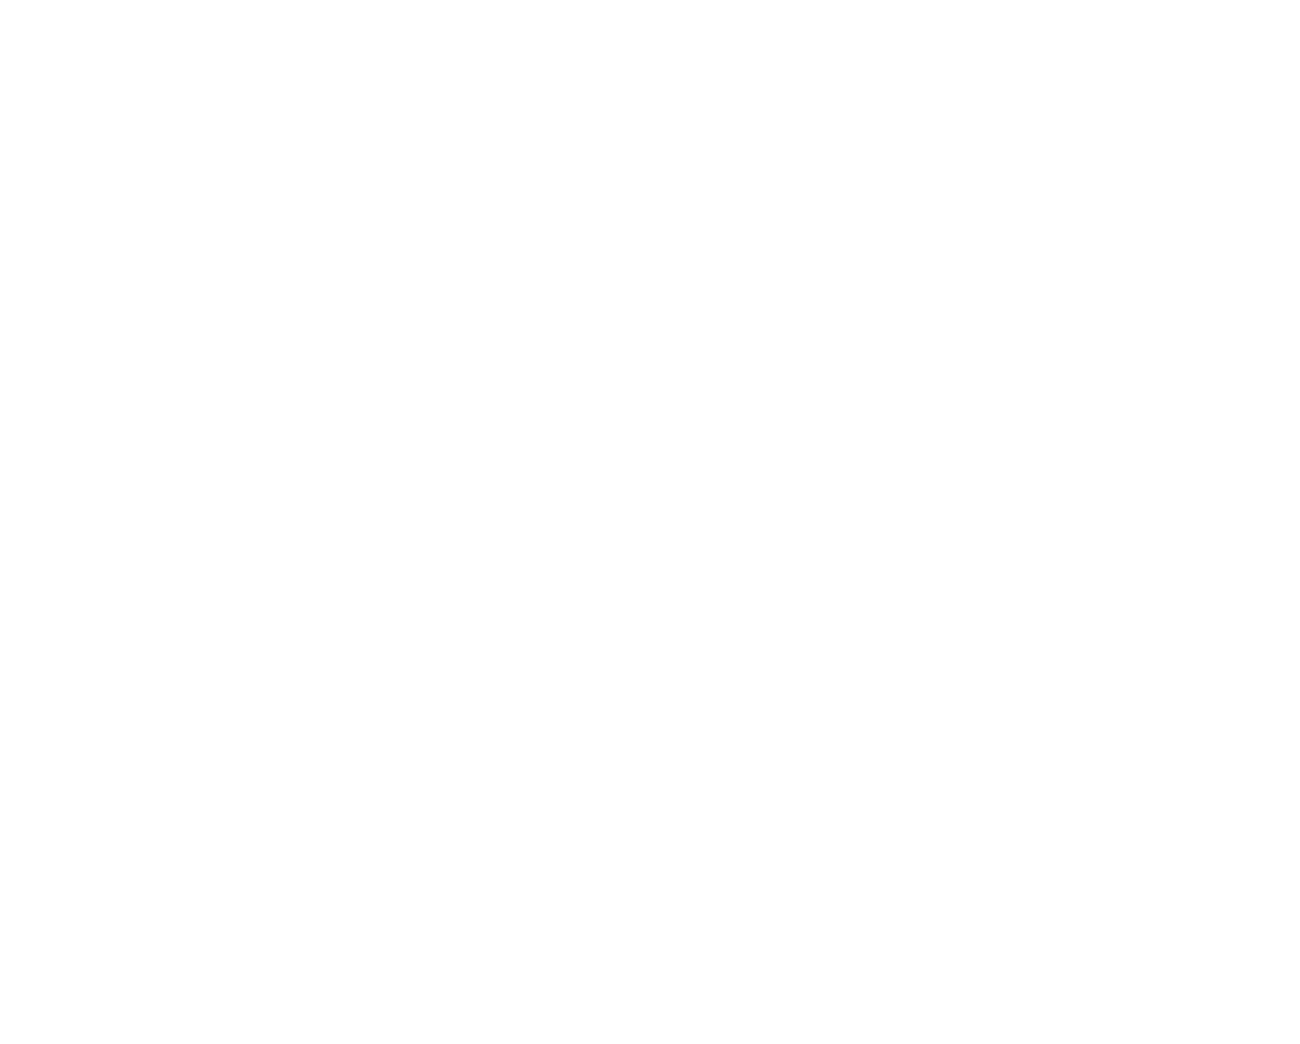

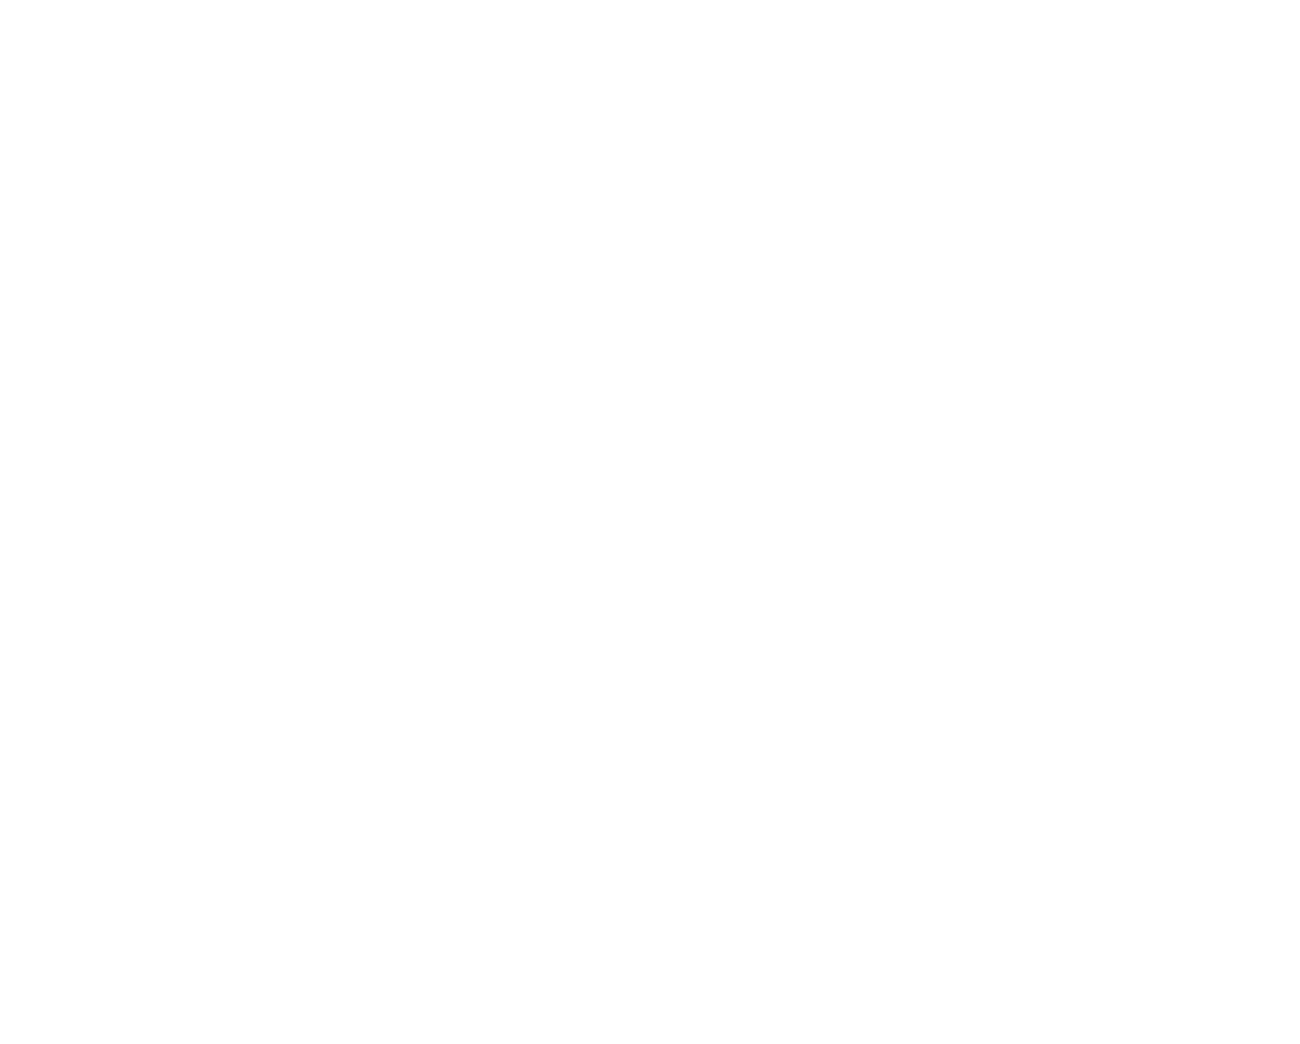

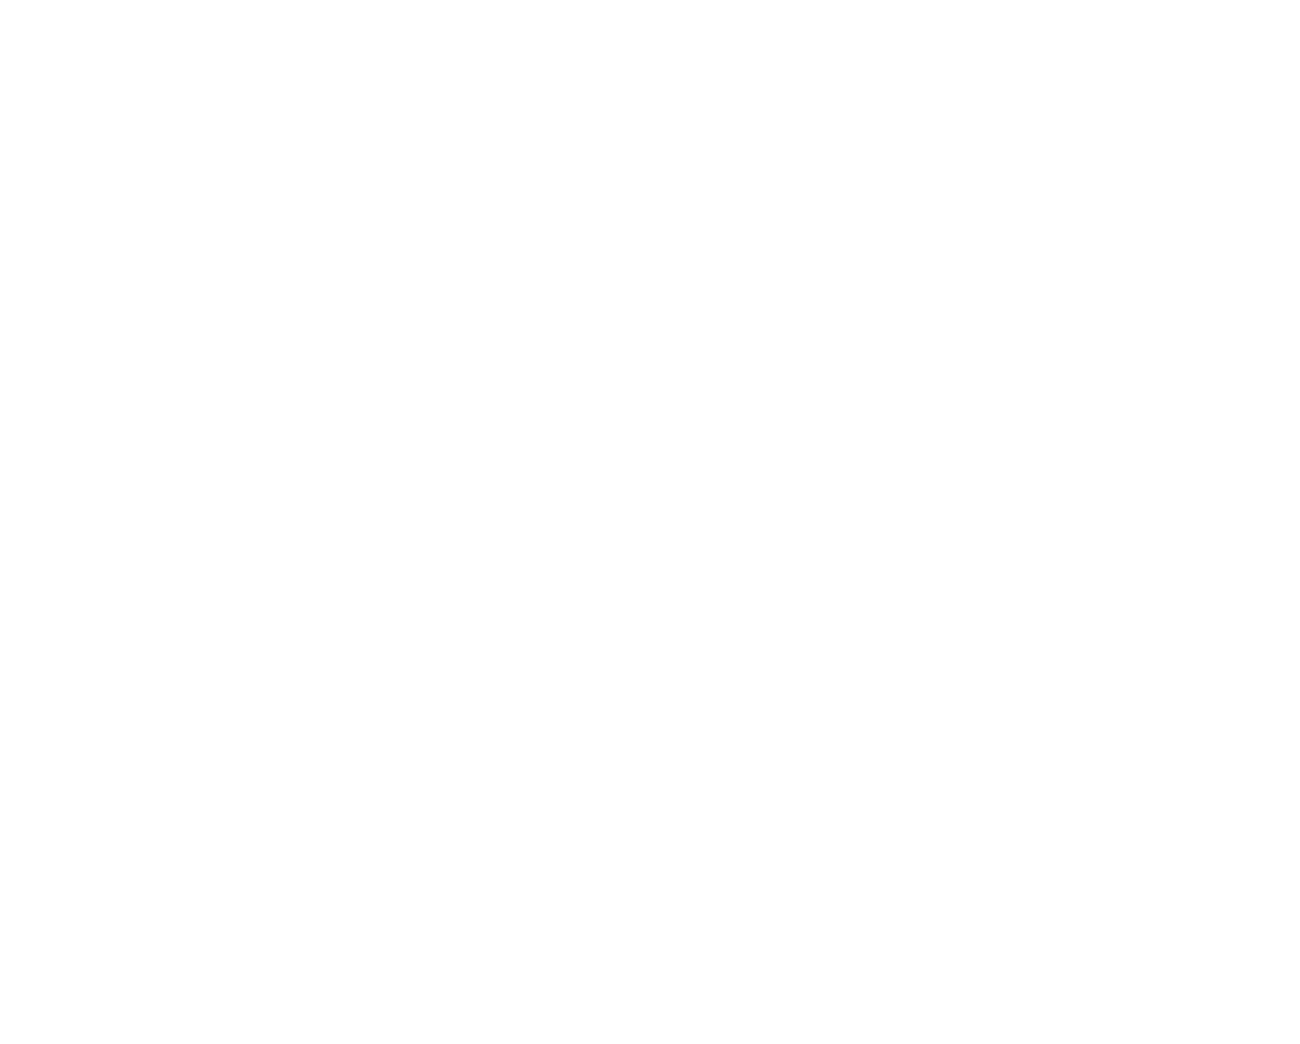

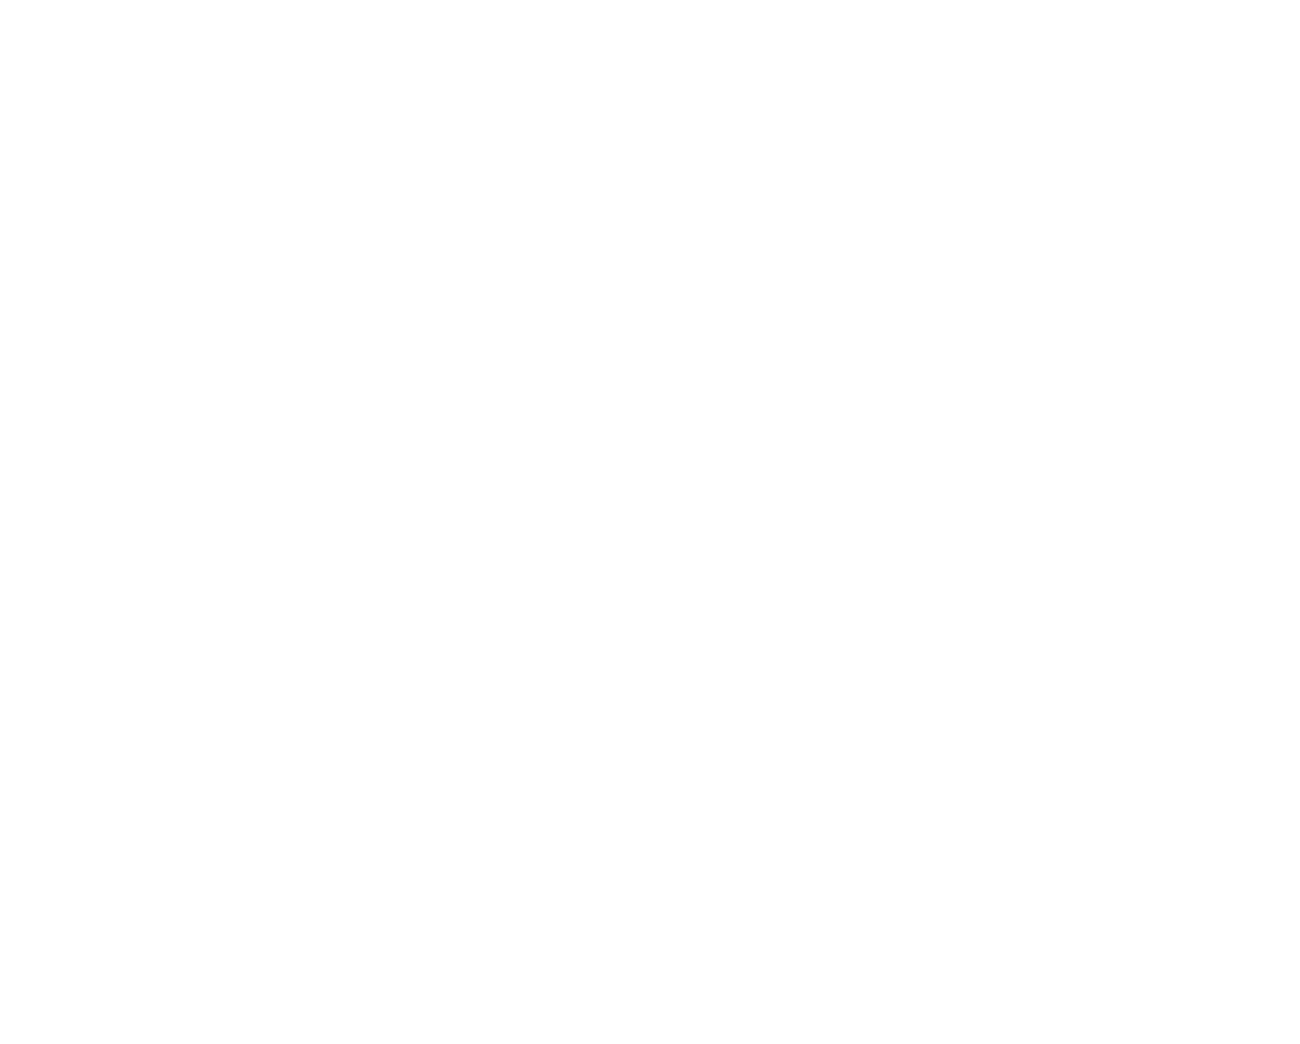

In [11]:
# start evaluating the network
dlc.evaluate_network(config_path,Shuffles = [1], plotting = True)

In [8]:
# analyze video
video_path = ['/content/gdrive/MyDrive/deeplabcut/flies-seizure-huiqi-2022-10-13/videos']
dlc.analyze_videos(config_path,video_path,shuffle = 1,save_as_csv = True, videotype = '.avi')


Using snapshot-30000 for model /content/gdrive/MyDrive/deeplabcut/flies-seizure-huiqi-2022-10-13/dlc-models/iteration-0/flies-seizureOct13-trainset95shuffle1


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


Analyzing all the videos in the directory...
Starting to analyze %  /content/gdrive/MyDrive/deeplabcut/flies-seizure-huiqi-2022-10-13/videos/untreat_001.avi
Loading  /content/gdrive/MyDrive/deeplabcut/flies-seizure-huiqi-2022-10-13/videos/untreat_001.avi
Duration of video [s]:  527.19 , recorded with  10.57 fps!
Overall # of frames:  5575  found with (before cropping) frame dimensions:  1280 1024
Starting to extract posture


100%|█████████▉| 5555/5575 [08:47<00:01, 10.52it/s]


Saving results in /content/gdrive/MyDrive/deeplabcut/flies-seizure-huiqi-2022-10-13/videos...
Saving csv poses!
Starting to analyze %  /content/gdrive/MyDrive/deeplabcut/flies-seizure-huiqi-2022-10-13/videos/untreat_002.avi
Loading  /content/gdrive/MyDrive/deeplabcut/flies-seizure-huiqi-2022-10-13/videos/untreat_002.avi
Duration of video [s]:  551.6 , recorded with  10.56 fps!
Overall # of frames:  5826  found with (before cropping) frame dimensions:  1280 1024
Starting to extract posture


100%|█████████▉| 5800/5826 [08:57<00:02, 10.78it/s]


Saving results in /content/gdrive/MyDrive/deeplabcut/flies-seizure-huiqi-2022-10-13/videos...
Saving csv poses!
Starting to analyze %  /content/gdrive/MyDrive/deeplabcut/flies-seizure-huiqi-2022-10-13/videos/untreat_004.avi
Loading  /content/gdrive/MyDrive/deeplabcut/flies-seizure-huiqi-2022-10-13/videos/untreat_004.avi
Duration of video [s]:  418.17 , recorded with  10.39 fps!
Overall # of frames:  4346  found with (before cropping) frame dimensions:  1280 1024
Starting to extract posture


100%|█████████▉| 4343/4346 [06:25<00:00, 11.27it/s]


Saving results in /content/gdrive/MyDrive/deeplabcut/flies-seizure-huiqi-2022-10-13/videos...
Saving csv poses!
Starting to analyze %  /content/gdrive/MyDrive/deeplabcut/flies-seizure-huiqi-2022-10-13/videos/untreat_003.avi
Loading  /content/gdrive/MyDrive/deeplabcut/flies-seizure-huiqi-2022-10-13/videos/untreat_003.avi
Duration of video [s]:  603.78 , recorded with  10.42 fps!
Overall # of frames:  6292  found with (before cropping) frame dimensions:  1280 1024
Starting to extract posture


100%|█████████▉| 6262/6292 [09:37<00:02, 10.84it/s]


Saving results in /content/gdrive/MyDrive/deeplabcut/flies-seizure-huiqi-2022-10-13/videos...
Saving csv poses!
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.


'DLC_resnet50_flies-seizureOct13shuffle1_30000'

In [6]:
# create videos with labels
video_path = ['/content/gdrive/MyDrive/deeplabcut/flies-seizure-huiqi-2022-10-13/videos']
dlc.create_labeled_video(config_path,video_path)

Analyzing all the videos in the directory...
Starting to process video: /content/gdrive/MyDrive/deeplabcut/flies-seizure-huiqi-2022-10-13/videos/untreat_004.aviStarting to process video: /content/gdrive/MyDrive/deeplabcut/flies-seizure-huiqi-2022-10-13/videos/untreat_002.avi


Loading /content/gdrive/MyDrive/deeplabcut/flies-seizure-huiqi-2022-10-13/videos/untreat_004.avi and data.Loading /content/gdrive/MyDrive/deeplabcut/flies-seizure-huiqi-2022-10-13/videos/untreat_002.avi and data.
Duration of video [s]: 418.17, recorded with 10.39 fps!

Overall # of frames: 4346 with cropped frame dimensions: 1280 1024Generating frames and creating video.


  0%|          | 10/4346 [00:00<01:25, 50.97it/s]

Duration of video [s]: 551.6, recorded with 10.56 fps!
Overall # of frames: 5826 with cropped frame dimensions: 1280 1024
Generating frames and creating video.


100%|██████████| 4346/4346 [01:32<00:00, 46.99it/s]


Starting to process video: /content/gdrive/MyDrive/deeplabcut/flies-seizure-huiqi-2022-10-13/videos/untreat_003.avi
Loading /content/gdrive/MyDrive/deeplabcut/flies-seizure-huiqi-2022-10-13/videos/untreat_003.avi and data.


 42%|████▏     | 2449/5826 [01:33<01:15, 44.47it/s]

Duration of video [s]: 603.78, recorded with 10.42 fps!
Overall # of frames: 6292 with cropped frame dimensions: 1280 1024
Generating frames and creating video.


 84%|████████▍ | 5308/6292 [02:01<00:21, 45.91it/s]

Starting to process video: /content/gdrive/MyDrive/deeplabcut/flies-seizure-huiqi-2022-10-13/videos/untreat_001.avi
Loading /content/gdrive/MyDrive/deeplabcut/flies-seizure-huiqi-2022-10-13/videos/untreat_001.avi and data.


 86%|████████▌ | 5406/6292 [02:03<00:13, 67.28it/s]

Duration of video [s]: 527.19, recorded with 10.57 fps!
Overall # of frames: 5575 with cropped frame dimensions: 1280 1024
Generating frames and creating video.


100%|██████████| 5575/5575 [02:13<00:00, 41.65it/s]


In [8]:
dlc.extract_outlier_frames(config_path,video_path)

/usr/local/lib/python3.7/dist-packages/deeplabcut/refine_training_dataset/outlier_frames.py:401: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  sum_ = temp_dt.sum(axis=1, level=1)


Analyzing all the videos in the directory...
Method  jump  found  1591  putative outlier frames.
Do you want to proceed with extracting  20  of those?
If this list is very large, perhaps consider changing the parameters (start, stop, p_bound, comparisonbodyparts) or use a different method.
yes/noy
Frames from video untreat_002  already extracted (more will be added)!
Loading video...
Duration of video [s]:  551.7045454545454 , recorded @  10.56 fps!
Overall # of frames:  2913 with (cropped) frame dimensions: 
Kmeans-quantization based extracting of frames from 0.0  seconds to 275.85  seconds.
Extracting and downsampling... 1591  frames from the video.


1591it [04:07,  6.42it/s]


Kmeans clustering ... (this might take a while)
Let's select frames indices: [1057, 2723, 12, 1555, 2458, 1059, 425, 2796, 1846, 2038, 1345, 2136, 273, 1414, 1364, 2617, 568, 836, 206, 1300]


/usr/local/lib/python3.7/dist-packages/deeplabcut/refine_training_dataset/outlier_frames.py:460: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  askuser = input("yes/no")


Attempting to create a symbolic link of the video ...
Symlink creation impossible (exFat architecture?): cutting/pasting the video instead.
/content/gdrive/MyDrive/deeplabcut/flies-seizure-huiqi-2022-10-13/videos/untreat_002.avi moved to /content/gdrive/MyDrive/deeplabcut/flies-seizure-huiqi-2022-10-13/videos/untreat_002.avi
New videos were added to the project! Use the function 'extract_frames' to select frames for labeling.
The outlier frames are extracted. They are stored in the subdirectory labeled-data\untreat_002.
Once you extracted frames for all videos, use 'refine_labels' to manually correct the labels.
Method  jump  found  948  putative outlier frames.
Do you want to proceed with extracting  20  of those?
If this list is very large, perhaps consider changing the parameters (start, stop, p_bound, comparisonbodyparts) or use a different method.
yes/noy
Frames from video untreat_004  already extracted (more will be added)!
Loading video...
Duration of video [s]:  418.28681424446

948it [01:21, 11.63it/s]


Kmeans clustering ... (this might take a while)


/usr/local/lib/python3.7/dist-packages/deeplabcut/refine_training_dataset/outlier_frames.py:946: UserWarning: /content/gdrive/MyDrive/deeplabcut/flies-seizure-huiqi-2022-10-13/labeled-data/untreat_004/img1742.png is a low contrast image
  io.imsave(imagename1, image)
/usr/local/lib/python3.7/dist-packages/deeplabcut/refine_training_dataset/outlier_frames.py:946: UserWarning: /content/gdrive/MyDrive/deeplabcut/flies-seizure-huiqi-2022-10-13/labeled-data/untreat_004/img1359.png is a low contrast image
  io.imsave(imagename1, image)
/usr/local/lib/python3.7/dist-packages/deeplabcut/refine_training_dataset/outlier_frames.py:946: UserWarning: /content/gdrive/MyDrive/deeplabcut/flies-seizure-huiqi-2022-10-13/labeled-data/untreat_004/img1403.png is a low contrast image
  io.imsave(imagename1, image)
/usr/local/lib/python3.7/dist-packages/deeplabcut/refine_training_dataset/outlier_frames.py:946: UserWarning: /content/gdrive/MyDrive/deeplabcut/flies-seizure-huiqi-2022-10-13/labeled-data/untreat

Let's select frames indices: [1309, 1742, 1075, 1359, 1403, 1411, 2141, 1288, 1385, 70, 1697, 392, 1316, 1496, 1704, 978, 993, 1351, 1925, 1281]
Attempting to create a symbolic link of the video ...
Symlink creation impossible (exFat architecture?): cutting/pasting the video instead.
/content/gdrive/MyDrive/deeplabcut/flies-seizure-huiqi-2022-10-13/videos/untreat_004.avi moved to /content/gdrive/MyDrive/deeplabcut/flies-seizure-huiqi-2022-10-13/videos/untreat_004.avi
New videos were added to the project! Use the function 'extract_frames' to select frames for labeling.
The outlier frames are extracted. They are stored in the subdirectory labeled-data\untreat_004.
Once you extracted frames for all videos, use 'refine_labels' to manually correct the labels.
Method  jump  found  2366  putative outlier frames.
Do you want to proceed with extracting  20  of those?
If this list is very large, perhaps consider changing the parameters (start, stop, p_bound, comparisonbodyparts) or use a differe

2366it [06:09,  6.40it/s]


Kmeans clustering ... (this might take a while)
Let's select frames indices: [670, 2761, 1778, 21, 1882, 304, 2676, 1860, 969, 2645, 578, 2008, 1082, 1622, 1828, 2334, 1080, 2452, 2587, 1162]


/usr/local/lib/python3.7/dist-packages/deeplabcut/refine_training_dataset/outlier_frames.py:460: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  askuser = input("yes/no")


Attempting to create a symbolic link of the video ...
Symlink creation impossible (exFat architecture?): cutting/pasting the video instead.
/content/gdrive/MyDrive/deeplabcut/flies-seizure-huiqi-2022-10-13/videos/untreat_001.avi moved to /content/gdrive/MyDrive/deeplabcut/flies-seizure-huiqi-2022-10-13/videos/untreat_001.avi
New videos were added to the project! Use the function 'extract_frames' to select frames for labeling.
The outlier frames are extracted. They are stored in the subdirectory labeled-data\untreat_001.
Once you extracted frames for all videos, use 'refine_labels' to manually correct the labels.
Method  jump  found  2290  putative outlier frames.
Do you want to proceed with extracting  20  of those?
If this list is very large, perhaps consider changing the parameters (start, stop, p_bound, comparisonbodyparts) or use a different method.
yes/noy
Loading video...
Duration of video [s]:  603.8387715930902 , recorded @  10.42 fps!
Overall # of frames:  3146 with (cropped) 

2290it [03:43, 10.24it/s]


Kmeans clustering ... (this might take a while)
Let's select frames indices: [1446, 245, 2959, 1119, 1592, 2467, 3121, 1543, 1875, 1486, 1506, 2155, 1932, 2807, 974, 2864, 1969, 480, 1995, 1466]


/usr/local/lib/python3.7/dist-packages/deeplabcut/refine_training_dataset/outlier_frames.py:946: UserWarning: /content/gdrive/MyDrive/deeplabcut/flies-seizure-huiqi-2022-10-13/labeled-data/untreat_003/img1446.png is a low contrast image
  io.imsave(imagename1, image)


Attempting to create a symbolic link of the video ...
Symlink creation impossible (exFat architecture?): cutting/pasting the video instead.
/content/gdrive/MyDrive/deeplabcut/flies-seizure-huiqi-2022-10-13/videos/untreat_003.avi moved to /content/gdrive/MyDrive/deeplabcut/flies-seizure-huiqi-2022-10-13/videos/untreat_003.avi
New videos were added to the project! Use the function 'extract_frames' to select frames for labeling.
The outlier frames are extracted. They are stored in the subdirectory labeled-data\untreat_003.
Once you extracted frames for all videos, use 'refine_labels' to manually correct the labels.


In [ ]:
# the network is not trained enough. go on training directly
dlc.train_network(config_path,shuffle = 1, displayiters = 500,saveiters=10000,maxiters=200000)

Selecting single-animal trainer


Config:
{'all_joints': [[0],
                [1],
                [2],
                [3],
                [4],
                [5],
                [6],
                [7],
                [8],
                [9],
                [10],
                [11],
                [12],
                [13]],
 'all_joints_names': ['mouth',
                      'head',
                      'thorax',
                      'belly_upper',
                      'belly_mid',
                      'belly_dist',
                      'legDist_left_fore',
                      'legDist_left_mid',
                      'legDist_left_hind',
                      'legDist_right_fore',
                      'legDist_right_mid',
                      'legDist_right_hind',
                      'thorax_back',
                      'abdomen'],
 'alpha_r': 0.02,
 'apply_prob': 0.5,
 'batch_size': 1,
 'contrast': {'clahe': True,
              'claheratio': 0.1,
              'histeq': True,
              

Batch Size is 1


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


Loading already trained DLC with backbone: resnet_50
Max_iters overwritten as 100000
Display_iters overwritten as 500
Save_iters overwritten as 10000
Training parameter:
{'stride': 8.0, 'weigh_part_predictions': False, 'weigh_negatives': False, 'fg_fraction': 0.25, 'mean_pixel': [123.68, 116.779, 103.939], 'shuffle': True, 'snapshot_prefix': '/content/gdrive/MyDrive/deeplabcut/flies-seizure-huiqi-2022-10-13/dlc-models/iteration-0/flies-seizureOct13-trainset95shuffle1/train/snapshot', 'log_dir': 'log', 'global_scale': 0.8, 'location_refinement': True, 'locref_stdev': 7.2801, 'locref_loss_weight': 0.05, 'locref_huber_loss': True, 'optimizer': 'sgd', 'intermediate_supervision': False, 'intermediate_supervision_layer': 12, 'regularize': False, 'weight_decay': 0.0001, 'crop_pad': 0, 'scoremap_dir': 'test', 'batch_size': 1, 'dataset_type': 'imgaug', 'deterministic': False, 'mirror': False, 'pairwise_huber_loss': False, 'weigh_only_present_joints': False, 'partaffinityfield_predict': False, '

iteration: 80500 loss: 0.0019 lr: 0.005
iteration: 81000 loss: 0.0019 lr: 0.005
iteration: 81500 loss: 0.0018 lr: 0.005
iteration: 82000 loss: 0.0019 lr: 0.005
iteration: 82500 loss: 0.0018 lr: 0.005
iteration: 83000 loss: 0.0019 lr: 0.005
iteration: 83500 loss: 0.0018 lr: 0.005
iteration: 84000 loss: 0.0018 lr: 0.005
iteration: 84500 loss: 0.0018 lr: 0.005
iteration: 85000 loss: 0.0018 lr: 0.005
iteration: 85500 loss: 0.0018 lr: 0.005
iteration: 86000 loss: 0.0018 lr: 0.005
iteration: 86500 loss: 0.0017 lr: 0.005
iteration: 87000 loss: 0.0018 lr: 0.005
iteration: 87500 loss: 0.0017 lr: 0.005
iteration: 88000 loss: 0.0018 lr: 0.005
iteration: 88500 loss: 0.0017 lr: 0.005
iteration: 89000 loss: 0.0017 lr: 0.005
iteration: 89500 loss: 0.0017 lr: 0.005
iteration: 90000 loss: 0.0017 lr: 0.005
iteration: 90500 loss: 0.0019 lr: 0.02
iteration: 91000 loss: 0.0021 lr: 0.02
iteration: 91500 loss: 0.0019 lr: 0.02
iteration: 92000 loss: 0.0020 lr: 0.02
iteration: 92500 loss: 0.0020 lr: 0.02
itera